# Notebook to plot discharging curves derived with COMSOL
### Currently tailored toward datasests with two c-rates (-1/-3)

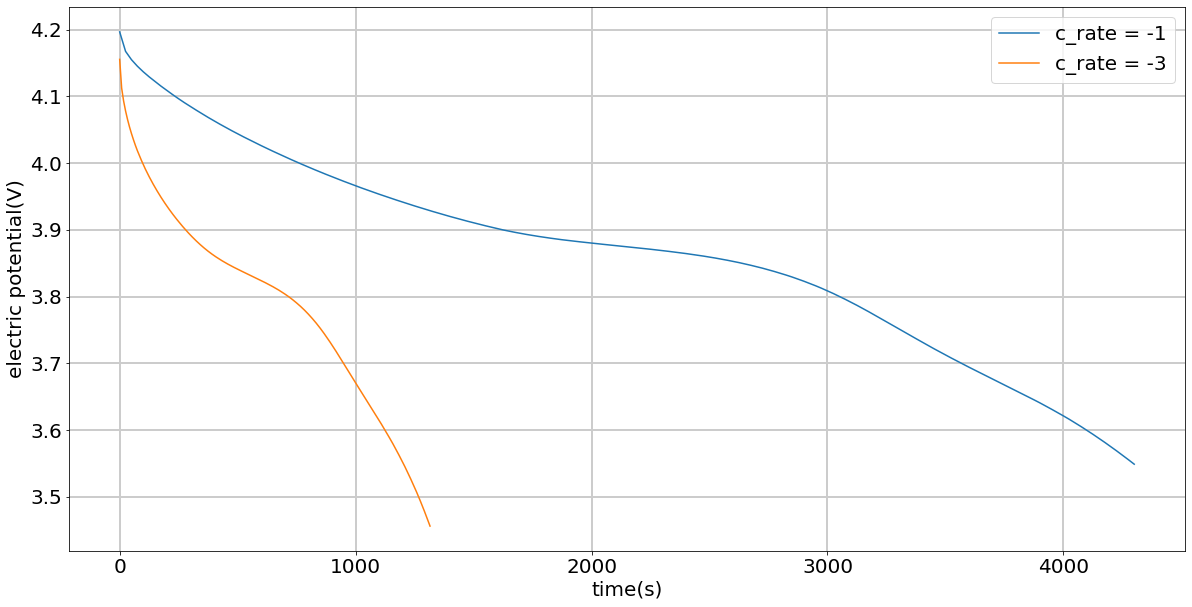

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import os

def plot_chart (time_a, time_b, voltage_a, voltage_b, title_a, title_b, save_name):
    """
    function to plots the charts and saves to new folder
    """
    labelsize = 20
    today = datetime.today().strftime('%Y-%m-%d')
    save_name = save_name +'_' + today
    
    fig=plt.figure(1, figsize = (20, 10))
    
    plt.plot(time_a, voltage_a, label = title_a)
    plt.plot(time_b, voltage_b, label = title_b)
        
    plt.legend(loc ="upper right", fontsize=labelsize)   
    plt.xlabel("time(s)", fontsize = labelsize)    
    plt.xticks(rotation=0, fontsize = labelsize)   
    plt.ylabel("electric potential(V)", fontsize = labelsize)
    plt.yticks(fontsize = labelsize)
    plt.grid(True, color='0.8', linestyle='-', linewidth=2)
    plt.show
    plt.savefig(save_name)
    return

def sort_input_data (input_file):
    """
    creates the two dataframes from the one original dataframe that contains data for two c_rates (-1 and -3)
    """
    #read input dataframe
    df = pd.read_excel(input_file, skiprows = 4)
    #rename columns for easier handling
    df = df.rename(columns = {'Elektrisches Potential auf dem Rand (V)':'voltage', 't (s)' : 'time'})
    #set c_rate as index
    df = df.set_index('c_rate')

    #filter two different dataframes containing the individual voltages for corresponding c_rates
    df_c_1 = df.filter(like = '-1', axis = 0)
    df_c_3 = df.filter(like = '-3', axis = 0)
    
    return df_c_1, df_c_3

def plot_multiple_charts(df_c_1, df_c_3, save_name):
    """
    takes the dataframes for the two different c_rates and correctly enters the values into the plot_chart function
    """
    
    time_a = list(df_c_1['time'])
    time_b = list(df_c_3['time'])
    
    voltage_a = list(df_c_1['voltage'])
    voltage_b = list(df_c_3['voltage'])
    
    title_a = 'c_rate = -1'
    title_b = 'c_rate = -3'
    
    plot_chart(time_a, time_b, voltage_a, voltage_b, title_a, title_b, save_name)

    return 

def main ():
    ##change these two parameters##
    save_name = 'test_simulation'
    input_file = '-50.xlsx'
    
    #execute above functions#
    df_c_1, df_c_3 = sort_input_data(input_file)
    plot_multiple_charts(df_c_1, df_c_3, save_name)
    
if __name__ == '__main__':
    main()